# Exoplanet SVM Classification using Cumulative Object of Interest Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 75)

## Support Vector Machine


In [3]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt

Read pickle files from data prep.

In [24]:
#Read Pickle Files
try:
    del df_rfecvTrainFillX, df_rfecvTestFillX, df_rfecvTrainMiceX, df_rfecvTestMiceX, topExoTrainFillX, topExoTestFillX, topExoTrainMiceX, topExoTestMiceX
except Exception as e:
    print(e)
    
df_rfecvTrainFillX = pd.read_pickle("./pkl/df_rfecvTrainFillX.pkl")
df_rfecvTestFillX = pd.read_pickle("./pkl/df_rfecvTestFillX.pkl")
topExoTrainFillX = pd.read_pickle("./pkl/topExoTrainFillX.pkl")
topExoTestFillX = pd.read_pickle("./pkl/topExoTestFillX.pkl")
df_scaledTrainFillX = pd.read_pickle("./pkl/df_scaledTrainFillX.pkl")
df_scaledTestFillX = pd.read_pickle("./pkl/df_scaledTestFillX.pkl")
df_scaledTrainMiceX = pd.read_pickle("./pkl/df_scaledTrainMiceX.pkl")
exoTrainFillX = pd.read_pickle("./pkl/exoTrainFillX.pkl")
exoTestFillX = pd.read_pickle("./pkl/exoTestFillX.pkl")

df_rfecvTrainMiceX = pd.read_pickle("./pkl/df_rfecvTrainMiceX.pkl")
df_rfecvTestMiceX = pd.read_pickle("./pkl/df_rfecvTestMiceX.pkl")
topExoTrainMiceX = pd.read_pickle("./pkl/topExoTrainMiceX.pkl")
topExoTestMiceX = pd.read_pickle("./pkl/topExoTestMiceX.pkl")


#Response Variables
exoTrainFillY = pd.read_pickle("./pkl/exoTrainFillY.pkl")
exoTestFillY = pd.read_pickle("./pkl/exoTestFillY.pkl")
exoTrainMiceY = pd.read_pickle("./pkl/exoTrainMiceY.pkl")
exoTestMiceY = pd.read_pickle("./pkl/exoTestMiceY.pkl")
exoTestY = pd.read_pickle("./pkl/exoTestY.pkl")
exoTrainY = pd.read_pickle("./pkl/exoTrainY.pkl")

### GridSearchCV
GridSearchCV is used to identify the optimal combination of parameters to use in out support vector machine model.  The ShuffleSplit cross validation object used in the remainder of the notebook is created here as well.

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit, cross_validate, StratifiedKFold, StratifiedShuffleSplit

#Create Cross Validation Objects
cvss = ShuffleSplit(n_splits = 10, test_size=0.20, random_state=0)
cvsss = StratifiedShuffleSplit(n_splits = 10, test_size=0.20, random_state=0)
cv = StratifiedKFold(n_splits=10)

In [7]:
#GridSearchCV SVC
svcEstimator = SVC()

parameters = { 'kernel':['linear', 'poly', 'rbf']
              ,'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'degree': [2, 3, 4]
              #,'class_weight':['dict', 'balanced', 'None']
              ,'random_state': [0]
              ,'gamma': ['auto']
             }

#Create a grid search object using the  
regGridSearch = GridSearchCV(estimator=svcEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # 
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(df_scaledTrainFillX, exoTrainFillY)

Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   56.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  4.4min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  7.1min
[Parallel(n_jobs=8)]: Done 630 out of 630 | elapsed: 27.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'degree': [2, 3, 4], 'gamma': ['auto'], 'random_state': [0], 'kernel': ['linear', 'poly', 'rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

Print the best estimator and it's accuracy score for the zero filled data.

In [8]:
#regGridSearch exoTrainFillX data
print(regGridSearch.best_estimator_)
print(regGridSearch.best_score_.round(4))

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
0.9888


Run GridSearchCV and print the best estimator and it's accuracy score for the Knn Imputed data.

In [11]:
#regGridSearch exoTrainMiceX data
regGridSearch.fit(df_scaledTrainMiceX, exoTrainMiceY)
print(regGridSearch.best_estimator_)
print(regGridSearch.best_score_.round(4))

##0.9878 @ fancy impute KNN = 10
##0.9885 @ fancy impute KNN = 21
##0.9885 @ fancy impute KNN = 83

Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   51.8s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  7.1min
[Parallel(n_jobs=8)]: Done 630 out of 630 | elapsed: 29.5min finished


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
0.9873


### Recursive Feature Elimination
This dataset has a relatively high number of features.  Unedited it contains over eighty features.  This number was cut to 61 in the data cleansing routines.  Utilizing all 61 features to train the SVM model could result in overfitting and produced less than optimal results on the test data set or any new objects of interest in the future.  Recursive feature elimination will be used for the zero filled and Knn imputed datasets to determine which features are the most significant.

#### RFECV Function

In [12]:
from sklearn.feature_selection import RFECV

def f_rfecv(est, st, cv, score, verb, X, y):
    rfecv = RFECV(estimator=est, step=st, cv=cv, scoring=score, verbose=verb, n_jobs=6)
    rfecv.fit(X, y)
    print(rfecv.ranking_)
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.grid(b=True, which='both', axis='both')
    plt.show()
    print("Optimal number of features : %d" % rfecv.n_features_, "|| Score:", rfecv.grid_scores_.max().round(4))
    return;

#### RFECV df_scaledTrainFillX

In [13]:
%%time

from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False), step=1, cv=cvsss, scoring='accuracy', verbose=0, n_jobs=12)
rfecv.fit(df_scaledTrainFillX, exoTrainFillY)
print(rfecv.ranking_)

[12  1  1  1 16  7 14 17  1  1  1  1  1  1  1  1  1 11  1  1  1  1  1  1
  1  1  1  2  1  1  9  1  1  1  1  5  1  1  1  6 10  1  1  1 13  1  4  3
  1  1  1  1 15  1  1  1  1  1  1  8  1]
CPU times: user 4min 36s, sys: 1.54 s, total: 4min 38s
Wall time: 57min 52s


Chart showing the optimal number of features for the zero filled data set using accuracy to compare different feature combinations.

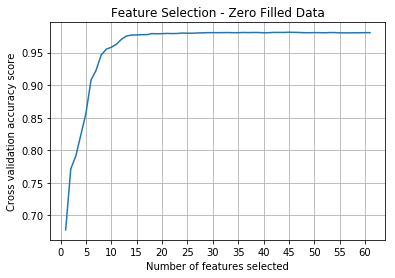

Optimal number of features : 45 || Score: 0.9812
Top 13 features : || Score: 0.9754
Top 17 features : || Score: 0.9775


In [14]:
plt.figure()
plt.title("Feature Selection - Zero Filled Data")
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation accuracy score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.xticks(np.arange(0,61,5))
plt.grid(b=True, which='both', axis='both')
plt.show()
print("Optimal number of features : %d" % rfecv.n_features_, "|| Score:", rfecv.grid_scores_.max().round(4))
print("Top 13 features :",  "|| Score:", rfecv.grid_scores_[12].round(4))
print("Top 17 features :",  "|| Score:", rfecv.grid_scores_[16].round(4))

In [15]:
rfecv.grid_scores_

array([0.67787115, 0.77121849, 0.79131653, 0.82394958, 0.85679272,
       0.90791317, 0.92282913, 0.94628852, 0.95518207, 0.95812325,
       0.96281513, 0.97037815, 0.97535014, 0.97689076, 0.97710084,
       0.97745098, 0.97745098, 0.97906162, 0.97885154, 0.9789916 ,
       0.97934174, 0.97913165, 0.97927171, 0.97997199, 0.97969188,
       0.97962185, 0.98011204, 0.9802521 , 0.98053221, 0.98053221,
       0.98053221, 0.98060224, 0.98067227, 0.98046218, 0.98046218,
       0.98081232, 0.98060224, 0.98081232, 0.9807423 , 0.98032213,
       0.98046218, 0.98088235, 0.98088235, 0.98088235, 0.98116246,
       0.98095238, 0.98081232, 0.98046218, 0.98039216, 0.98060224,
       0.98053221, 0.98032213, 0.98067227, 0.98067227, 0.9802521 ,
       0.9802521 , 0.9802521 , 0.98032213, 0.98032213, 0.98053221,
       0.98053221])

While the output of recursive feature eliminations show 32 features as producing the best accuracy score, examination of the results shows 17 features produces a high accuracy score with almost half the number of features.  The lower number of features will be used going forward to create a more generalized model.  The top features are identified and printed.

In [19]:
#17 features has same score as 32 features
#print(rfecv.grid_scores_[16], rfecv.grid_scores_[31])
#0.9871148459383754 0.9871148459383754

#https://stackoverflow.com/questions/51181170/selecting-a-specific-number-of-features-via-sklearns-rfecv-recursive-feature-e
#n = rfecv.n_features_ #optimal number of features Identified by algorithm
#n = 17 # to select top features
n = 13
feature_ranks = rfecv.ranking_  # selector is a RFECV fitted object
feature_ranks_with_idx = enumerate(feature_ranks)
sorted_ranks_with_idx = sorted(feature_ranks_with_idx, key=lambda x: x[1])
top_n_idx = [idx for idx, rnk in sorted_ranks_with_idx[:n]]
top_n_features = exoTrainFillX.iloc[:1, top_n_idx]
top_n_features

,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_dor
0,0,0,0,0.146,2.9575,616.0,0.022344,3.20796,2.26,0.0853,89.66,793.0,24.81


Create dataframe containing the top features from the zero filled dataset for scaled and unscaled data.

In [25]:
#Create Zero Fill dataframe for only the top features
df_rfecvTrainFillX = df_scaledTrainFillX.iloc[:, top_n_idx]
df_rfecvTestFillX = df_scaledTestFillX.iloc[:, top_n_idx]
df_rfecvTrainFillX.shape
topExoTrainFillX = exoTrainFillX.iloc[:, top_n_idx]
topExoTestFillX = exoTestFillX.iloc[:, top_n_idx]

In [26]:
#Save to Pickle Files
df_rfecvTrainFillX.to_pickle('./pkl/df_rfecvTrainFillX.pkl')
df_rfecvTestFillX.to_pickle('./pkl/df_rfecvTestFillX.pkl')
topExoTrainFillX.to_pickle('./pkl/topExoTrainFillX.pkl')
topExoTestFillX.to_pickle('./pkl/topExoTestFillX.pkl')

#### RFECV df_scaledTrainMiceX

In [27]:
%%time

from sklearn.feature_selection import RFECV

rfecvMice = RFECV(estimator=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False), step=1, cv=cvsss, scoring='accuracy', verbose=0, n_jobs=12)
rfecvMice.fit(df_scaledTrainMiceX, exoTrainMiceY)
print(rfecvMice.ranking_)

[ 9  1  1  1  5 11 13 15  1  1  1  1  1  1 12  1  1  1  1  1  1  1  1  1
  1  1  1  1  3  1  2  1  1  4  1 10  1  1  1  1  1  1  1  1 14  1  6  8
  1  1  1  1  7  1  1  1  1  1  1  1  1]
CPU times: user 2min 48s, sys: 977 ms, total: 2min 49s
Wall time: 30min 8s


RFECV (using stratified shuffle split cross validation) identifies the optimal number of features being 47 for the Knn imputed dataset.  However, the chart show the accuracy showing relatively small improvements after approximately 20 features.  A second inflection point can be seen at approximately 14 features as well.  The top 14 or 20 features may be a good number for the Knn imputed dataset to create a generalized model.  

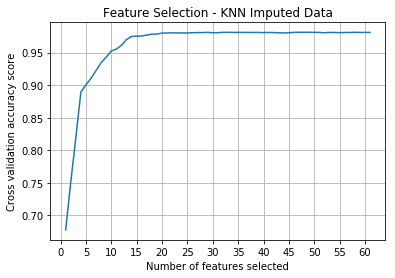

Optimal number of features : 47 || Score: 0.9812
Top 14 features : || Score: 0.9747
Top 20 features : || Score: 0.9799


In [73]:
plt.figure()
plt.title("Feature Selection - KNN Imputed Data")
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation accuracy score")
plt.plot(range(1, len(rfecvMice.grid_scores_) + 1), rfecvMice.grid_scores_)
plt.xticks(np.arange(0,61,5))
plt.grid(b=True, which='both', axis='both')
plt.show()
print("Optimal number of features : %d" % rfecvMice.n_features_, "|| Score:", rfecvMice.grid_scores_.max().round(4))
print("Top 14 features :",  "|| Score:", rfecvMice.grid_scores_[13].round(4))
print("Top 20 features :",  "|| Score:", rfecvMice.grid_scores_[19].round(4))

In [64]:
rfecvMice.grid_scores_[13]

0.9747198879551819

Identify and print the top features for the Knn imputed dataset.

In [96]:
#n = rfecvMice.n_features_ # to select top X features
n=14
feature_ranks = rfecvMice.ranking_  # selector is a RFECV fitted object
feature_ranks_with_idx = enumerate(feature_ranks)
sorted_ranks_with_idx = sorted(feature_ranks_with_idx, key=lambda x: x[1])
top_n_idx = [idx for idx, rnk in sorted_ranks_with_idx[:n]]
top_n_features = exoTrainMiceX.iloc[:1, top_n_idx]
top_n_features

,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff2
0,0.0,0.0,0.0,0.146,2.9575,616.0,0.022344,3.20796,2.26,89.66,793.0,93.59,24.81,0.2291


Create dataframe containing the top features for the Knn Imputed dataset for scaled and unscaled data.

In [97]:
#Create MICE dataframe for only the top features
df_rfecvTrainMiceX = df_scaledTrainMiceX.iloc[:, top_n_idx]
df_rfecvTestMiceX = df_scaledTestMiceX.iloc[:, top_n_idx]
df_rfecvTrainMiceX.shape
topExoTrainMiceX = exoTrainMiceX.iloc[:, top_n_idx]
topExoTestMiceX = exoTestMiceX.iloc[:, top_n_idx]

In [98]:
#Save to Pickle Files
df_rfecvTrainMiceX.to_pickle('./pkl/df_rfecvTrainMiceX.pkl')
df_rfecvTestMiceX.to_pickle('./pkl/df_rfecvTestMiceX.pkl')
topExoTrainMiceX.to_pickle('./pkl/topExoTrainMiceX.pkl')
topExoTestMiceX.to_pickle('./pkl/topExoTestMiceX.pkl')

### SVM Cross Validated
The SVM model will be trained and scored for the zero filled and Knn imputed datasets.  The SVM model object using the best estimator from GridSearchCV is created below.

In [4]:
svm_clf = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

Generic function to train and score cross validated SVM models.

In [5]:
#SVM Cross Validation and scoring Function
def svmCV(X, y, desc):
    for train_indices, test_indices in cvsss.split(X, y): 
        X_train = X.iloc[train_indices]
        y_train = y.iloc[train_indices]
        X_test = X.iloc[test_indices]
        y_test = y.iloc[test_indices]
        svm_clf.fit(X_train, y_train)  # train object
        
    y_hat = svm_clf.predict(X_test) # get test set precitions

    print("===== SVM for", desc, "with Shuffle Split Cross Validation =====")
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    prec = mt.precision_score(y_test, y_hat)
    recall = mt.recall_score(y_test, y_hat)
    print('accuracy:', acc.round(4) )
    print('precision:', prec.round(4))
    print('recall:', recall.round(4))
    print(conf)
    return acc, conf, prec, recall;

Read pickle files created above.  This allows us to start in this section and bypass the time consuming data cleansing, parameter selection and feature selection steps.

In [33]:
#Read Pickle Files
try:
    del df_rfecvTrainFillX, df_rfecvTestFillX, df_rfecvTrainMiceX, df_rfecvTestMiceX, topExoTrainFillX, topExoTestFillX, topExoTrainMiceX, topExoTestMiceX
except Exception as e:
    print(e)

exoTrainFillY = pd.read_pickle("./pkl/exoTrainFillY.pkl")  
exoTrainMiceY = pd.read_pickle('./pkl/exoTrainMiceY.pkl')
    
df_rfecvTrainFillX = pd.read_pickle("./pkl/df_rfecvTrainFillX.pkl")
df_rfecvTestFillX = pd.read_pickle("./pkl/df_rfecvTestFillX.pkl")
topExoTrainFillX = pd.read_pickle("./pkl/topExoTrainFillX.pkl")
topExoTestFillX = pd.read_pickle("./pkl/topExoTestFillX.pkl")
df_scaledTrainFillX = pd.read_pickle("./pkl/df_scaledTrainFillX.pkl")
df_scaledTestFillX = pd.read_pickle("./pkl/df_scaledTestFillX.pkl")

df_rfecvTrainMiceX = pd.read_pickle("./pkl/df_rfecvTrainMiceX.pkl")
df_rfecvTestMiceX = pd.read_pickle("./pkl/df_rfecvTestMiceX.pkl")
topExoTrainMiceX = pd.read_pickle("./pkl/topExoTrainMiceX.pkl")
topExoTestMiceX = pd.read_pickle("./pkl/topExoTestMiceX.pkl")

#### Train and score SVM for the zero filled dataset.

In [24]:
#df_scaledTrainFill with cross validation
svmCV(df_rfecvTrainFillX, exoTrainFillY, "Zero Filled Missing Data")
#n=13 accuracy: 0.9629
#n=17 accuracy: 0.9671
#n=45 accuracy: 0.9825

===== SVM for Zero Filled Missing Data with Shuffle Split Cross Validation =====
accuracy: 0.9629
precision: 0.9179
recall: 0.9717
[[928  40]
 [ 13 447]]


(0.9628851540616247, array([[928,  40],
        [ 13, 447]]), 0.917864476386037, 0.9717391304347827)

#### Prediction Post RFECV - Zero Fill

In [25]:
y_hatProbCandidatesFill = svm_clf.predict_proba(df_rfecvTestFillX)

In [26]:
y_hatProbCandidatesFill = pd.DataFrame(y_hatProbCandidatesFill)
y_hatProbCandidatesFill.describe()

,0,1
count,2426.000000,2.426000e+03
mean,0.632207,3.677926e-01
std,0.297519,2.975192e-01
min,0.000001,1.000000e-07
25%,0.405045,5.450049e-02
50%,0.632722,3.672783e-01
75%,0.945500,5.949552e-01
max,1.000000,9.999987e-01


In [27]:
#np.where(y_hatProbCandidates[1] >= 0.5)
print("Greater than 50%", np.count_nonzero(np.where(y_hatProbCandidatesFill[1] > 0.5)))
print("Greater than 80%", np.count_nonzero(np.where(y_hatProbCandidatesFill[1] > 0.8)))
print("Greater than 90%", np.count_nonzero(np.where(y_hatProbCandidatesFill[1] > 0.9)))
print("Greater than 95%", np.count_nonzero(np.where(y_hatProbCandidatesFill[1] > 0.95)))

Greater than 50% 846
Greater than 80% 234
Greater than 90% 122
Greater than 95% 71


#### Without RFECV

In [28]:
svmCV(df_scaledTrainFillX, exoTrainFillY, "Zero Filled Missing Data - No RFECV")

===== SVM for Zero Filled Missing Data - No RFECV with Shuffle Split Cross Validation =====
accuracy: 0.9923
precision: 0.9934
recall: 0.9826
[[965   3]
 [  8 452]]


(0.992296918767507, array([[965,   3],
        [  8, 452]]), 0.9934065934065934, 0.9826086956521739)

#### Prediction Without RFECV - Zero Fill

In [29]:
y_hatProbCandidatesFillNoRFECV = svm_clf.predict_proba(df_scaledTestFillX)

In [30]:
y_hatProbCandidatesFillNoRFECV = pd.DataFrame(y_hatProbCandidatesFillNoRFECV)
y_hatProbCandidatesFillNoRFECV.describe()

,0,1
count,2426.000000,2.426000e+03
mean,0.926533,7.346666e-02
std,0.154712,1.547117e-01
min,0.024250,1.000000e-07
25%,0.940206,1.212263e-03
50%,0.990161,9.839064e-03
75%,0.998788,5.979425e-02
max,1.000000,9.757500e-01


In [31]:
print("Greater than 50%", np.count_nonzero(np.where(y_hatProbCandidatesFillNoRFECV[1] > 0.5)))
print("Greater than 80%", np.count_nonzero(np.where(y_hatProbCandidatesFillNoRFECV[1] > 0.8)))
print("Greater than 90%", np.count_nonzero(np.where(y_hatProbCandidatesFillNoRFECV[1] > 0.9)))
print("Greater than 95%", np.count_nonzero(np.where(y_hatProbCandidatesFillNoRFECV[1] > 0.95)))

Greater than 50% 86
Greater than 80% 29
Greater than 90% 8
Greater than 95% 3


#### Train and score SVM for the Knn imputed dataset.

In [34]:
svmCV(df_rfecvTrainMiceX, exoTrainMiceY, "Knn Imputation")
#n=20 accuracy: 0.9215
#n=14 accuracy: 0.9538
#n=47 accuracy: 0.9

===== SVM for Knn Imputation with Shuffle Split Cross Validation =====
accuracy: 0.9818
precision: 0.9717
recall: 0.9717
[[955  13]
 [ 13 447]]


(0.9817927170868347, array([[955,  13],
        [ 13, 447]]), 0.9717391304347827, 0.9717391304347827)

#### Prediction Post RFECV - Knn Imputation

In [35]:
df_rfecvTestMiceX.shape

(2426, 47)

In [36]:
y_hatProbCandidates = svm_clf.predict_proba(df_rfecvTestMiceX)

In [37]:
y_hatProbCandidates = pd.DataFrame(y_hatProbCandidates)
y_hatProbCandidates.describe()

,0,1
count,2426.000000,2.426000e+03
mean,0.878907,1.210927e-01
std,0.224501,2.245008e-01
min,0.000002,1.000000e-07
25%,0.872863,5.999667e-04
50%,0.989569,1.043061e-02
75%,0.999400,1.271368e-01
max,1.000000,9.999976e-01


In [40]:
#np.where(y_hatProbCandidates[1] >= 0.5)
print("Greater than 50%:", np.count_nonzero(np.where(y_hatProbCandidates[1] > 0.5)))
print("Greater than 90%:", np.count_nonzero(np.where(y_hatProbCandidates[1] > 0.9)))
print("Greater than 95%:", np.count_nonzero(np.where(y_hatProbCandidates[1] > 0.95)))

Greater than 50%: 215
Greater than 90%: 50
Greater than 95%: 35


### Object of Interest Candidate Probabilities

In [63]:
#exoTestX_kepid
#mt.auc(y_test, y_hat)
#mt.roc_auc_score(y_, y_hat)

## Saved Code Appendix

####### changed to markdown since we have a function to train and score SVM
#df_scaledTrainFill with cross validation
for train_indices, test_indices in cv.split(df_rfecvTrainFillX, exoTrainFillY): 
    X_train = df_rfecvTrainFillX.iloc[train_indices]
    y_train = exoTrainFillY.iloc[train_indices]
    
    X_test = df_rfecvTrainFillX.iloc[test_indices]
    y_test = exoTrainFillY.iloc[test_indices]

svm_clf.fit(X_train, y_train)  # train object

y_hat = svm_clf.predict(X_test) # get test set precitions
y_hatProb = svm_clf.predict_proba(X_test)

print("===== SVM for Zero Filled Missing Data with Shuffle Split Cross Validation =====")
scoreSVM(y_test, y_hat)

####### changed to markdown since we have a function to train and score SVM
#df_scaledTrainMice with cross validation
for train_indices, test_indices in cv.split(df_rfecvTrainMiceX, exoTrainMiceY): 
    X_train = df_scaledTrainMiceX.iloc[train_indices]
    y_train = exoTrainMiceY.iloc[train_indices]
    
    X_test = df_scaledTrainMiceX.iloc[test_indices]
    y_test = exoTrainMiceY.iloc[test_indices]
    
svm_clf.fit(X_train, y_train)  # train object

y_hat = svm_clf.predict(X_test) # get test set precitions
y_hatProb = svm_clf.predict_proba(X_test)

print("===== SVM for KNN Imputed Missing Data with Shuffle Split Cross Validation =====")
scoreSVM(y_test, y_hat)